# Migrain Type Prediction Using Logistic Regression

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn import preprocessing

#### Reading Data

In [75]:
notebook_path = os.path.abspath("MigraineTypeLogisticRegression.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\migraine.csv")
df = pd.read_csv(path)

In [76]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


#### Data Cleaning

In [77]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [79]:
df.nunique()

Age            51
Duration        3
Frequency       8
Location        3
Character       3
Intensity       4
Nausea          2
Vomit           2
Phonophobia     2
Photophobia     2
Visual          5
Sensory         3
Dysphasia       2
Dysarthria      2
Vertigo         2
Tinnitus        2
Hypoacusis      2
Diplopia        2
Defect          2
Ataxia          1
Conscience      2
Paresthesia     2
DPF             2
Type            7
dtype: int64

In [80]:
df = df.drop_duplicates()
df.duplicated().values.any()

False

In [81]:
df = df.fillna(method="ffill")
pd.isnull(df).any()

Age            False
Duration       False
Frequency      False
Location       False
Character      False
Intensity      False
Nausea         False
Vomit          False
Phonophobia    False
Photophobia    False
Visual         False
Sensory        False
Dysphasia      False
Dysarthria     False
Vertigo        False
Tinnitus       False
Hypoacusis     False
Diplopia       False
Defect         False
Ataxia         False
Conscience     False
Paresthesia    False
DPF            False
Type           False
dtype: bool

In [82]:
df.drop('Ataxia', axis=1, inplace=True)

#### Data Visualization

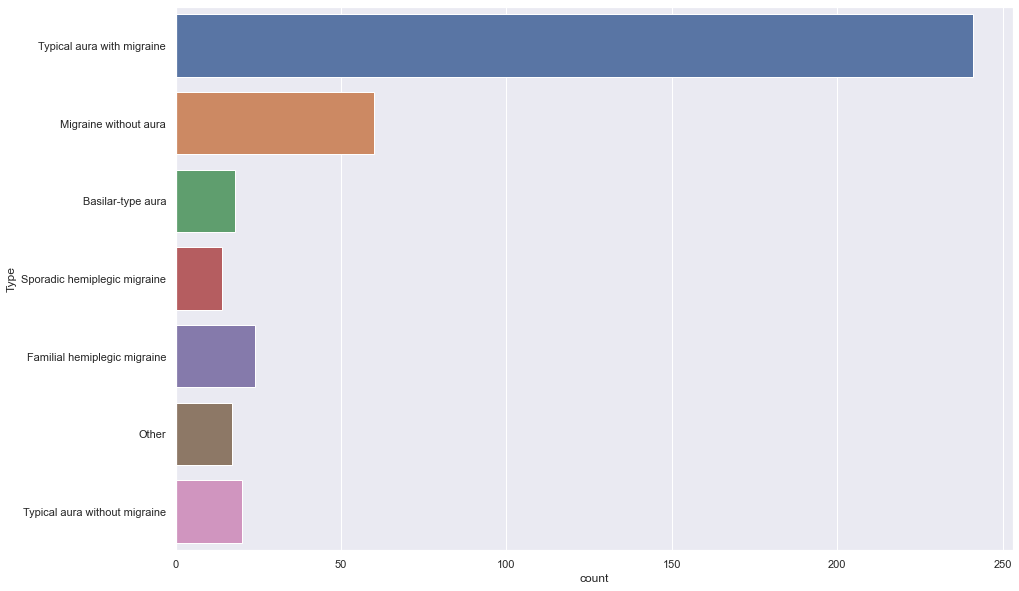

In [83]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(y=df['Type'])
plt.show()

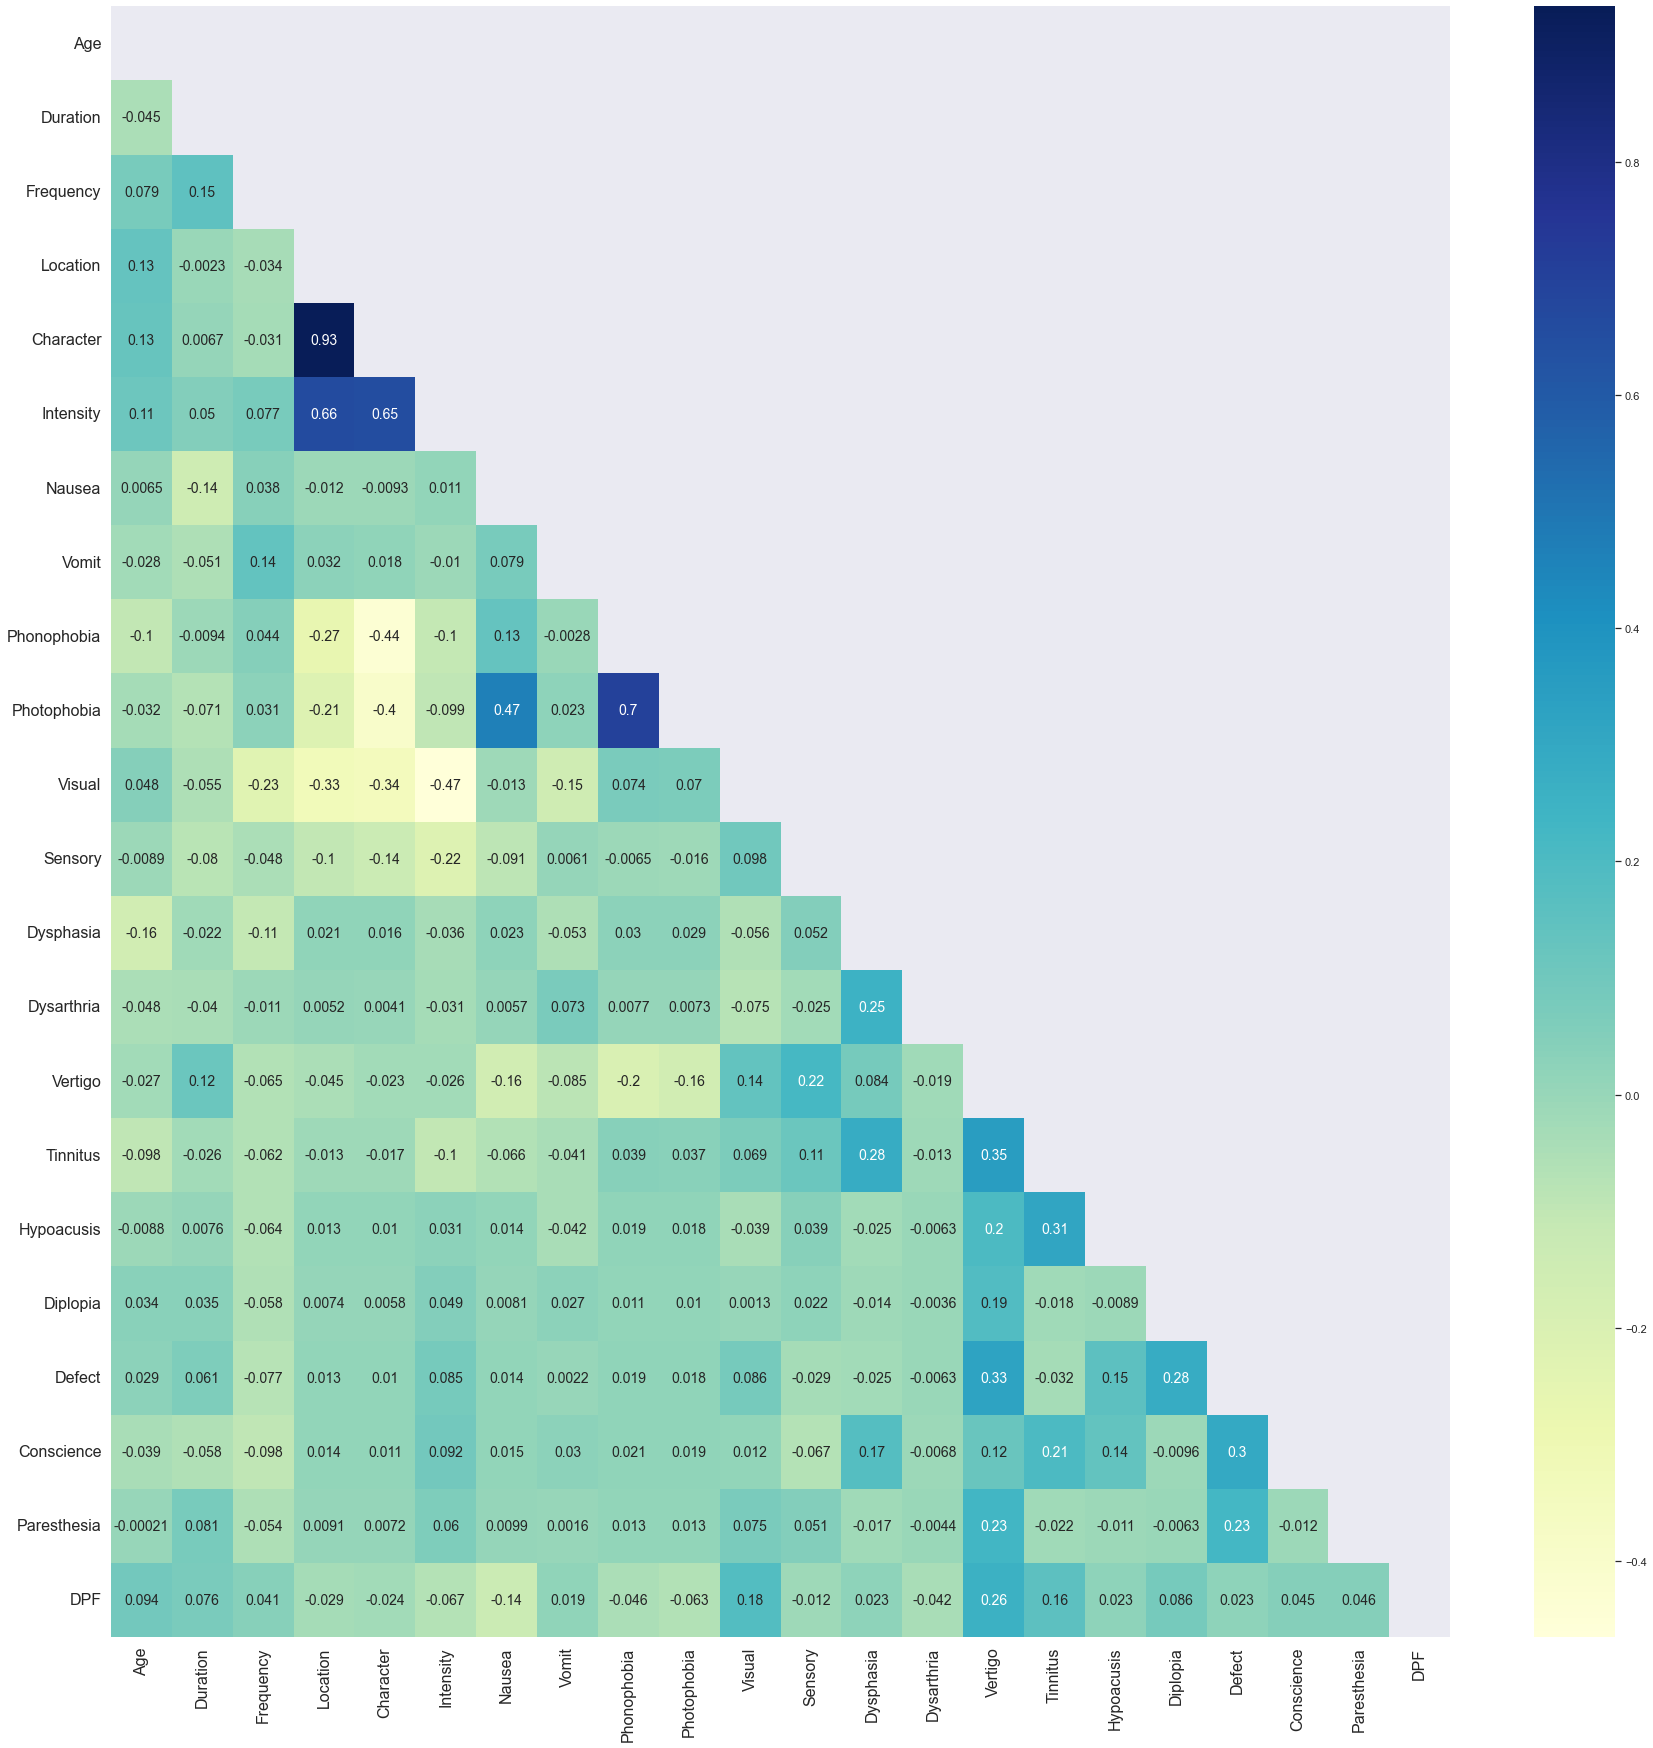

In [84]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16, rotation=0)
plt.show()

#### Data Transformation

In [85]:
le = preprocessing.LabelEncoder()

In [90]:
le.fit(df['Type'].unique())

LabelEncoder()

In [94]:
list(le.classes_)

['Basilar-type aura',
 'Familial hemiplegic migraine',
 'Migraine without aura',
 'Other',
 'Sporadic hemiplegic migraine',
 'Typical aura with migraine',
 'Typical aura without migraine']

In [99]:
df['Type'] = le.transform(df['Type'])

In [100]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5


In [101]:
df.tail()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Type
395,39,1,1,1,1,3,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
396,20,3,2,1,1,3,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
397,28,3,2,1,1,3,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
398,20,3,1,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,1,1,0
399,37,1,1,1,1,3,1,1,1,1,...,0,1,0,0,0,0,1,0,1,0


#### Model Training

In [159]:
x = df.drop('Type', axis=1)
y = df['Type']

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [188]:
x_train.shape

(315, 22)

In [205]:
y_train.shape

(315,)

In [190]:
model = LogisticRegression(C=0.05,solver='lbfgs',max_iter=1000,penalty='l2')
model.fit(x_train, y_train)

LogisticRegression(C=0.05, max_iter=1000)

In [191]:
logregPredict = model.predict(x_test)
logregPredict

array([5, 2, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 1, 5, 5, 6, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 6])

In [196]:
le.inverse_transform(logregPredict)

array(['Typical aura with migraine', 'Migraine without aura',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Typical aura with migraine',
       'Typical au

In [197]:
le.inverse_transform(y_test)

array(['Basilar-type aura', 'Migraine without aura',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Basilar-type aura', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Sporadic hemiplegic migraine',
       'Basilar-type aura', 'Basilar-type aura', 'Basilar-type aura',
       'Familial hemiplegic migraine', 'Typical aura without migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura witho

In [206]:
print("Accuracy:",accuracy_score(y_test, logregPredict))

Accuracy: 0.8227848101265823
